<a href="https://colab.research.google.com/github/aditya00kumar/data-science-with-python/blob/master/Perceptron_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

**Create dataset**

In [89]:
n_points = 100
centers = [[-0.5,0.5], [0.5,-0.5]]
X,y = datasets.make_blobs(n_samples=n_points, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.tensor(X)
y_data = torch.tensor(y.reshape(100,1))
print(y.shape)

(100,)


In [0]:
def plot_scatter():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

**Plot scatter data**

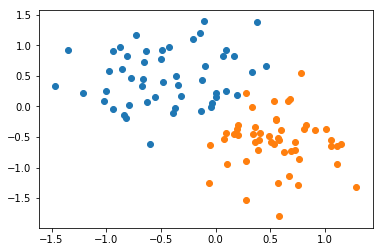

In [91]:
plot_scatter()

**Model**

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [93]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [95]:
get_params()

(0.16220331192016602, -0.1682732105255127, 0.19390898942947388)

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0]) 
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  

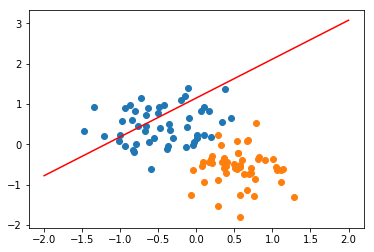

In [97]:
plot_scatter()
plot_fit('test')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
#model = model.double()

In [108]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred.float(), y_data.float())
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.25603345036506653
epoch: 1 loss: 0.2559147775173187
epoch: 2 loss: 0.25579628348350525
epoch: 3 loss: 0.2556779086589813
epoch: 4 loss: 0.2555598318576813
epoch: 5 loss: 0.2554418444633484
epoch: 6 loss: 0.2553239166736603
epoch: 7 loss: 0.25520631670951843
epoch: 8 loss: 0.25508877635002136
epoch: 9 loss: 0.2549714148044586
epoch: 10 loss: 0.2548542320728302
epoch: 11 loss: 0.25473710894584656
epoch: 12 loss: 0.25462016463279724
epoch: 13 loss: 0.254503458738327
epoch: 14 loss: 0.2543868124485016
epoch: 15 loss: 0.25427037477493286
epoch: 16 loss: 0.25415417551994324
epoch: 17 loss: 0.2540379464626312
epoch: 18 loss: 0.2539219856262207
epoch: 19 loss: 0.25380611419677734
epoch: 20 loss: 0.25369036197662354
epoch: 21 loss: 0.25357481837272644
epoch: 22 loss: 0.2534595727920532
epoch: 23 loss: 0.25334423780441284
epoch: 24 loss: 0.25322917103767395
epoch: 25 loss: 0.253114253282547
epoch: 26 loss: 0.25299954414367676
epoch: 27 loss: 0.2528848648071289
epoch: 28 loss: 0.

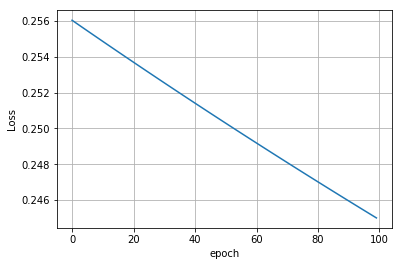

In [109]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

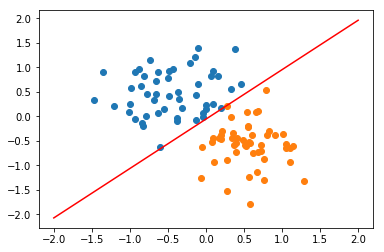

In [110]:
plot_scatter()
plot_fit("Trained Model")